# なにこれ？

アークナイツの各キャラのステータスのみで殴り合ったらどっちが勝つか判定するコードです  
信頼度ボーナスは考慮しますが素質とスキルは考慮していません  

In [1]:
using Plots
gr()

Plots.GRBackend()

In [2]:
module ark
mutable struct character
    name::String
    hp::Int64
    atk::Int64
    aps::Float64
    ismagic::Bool
    def::Int64
    res::Int64
end
end
skadi=ark.character("skadi",3665,1013,1.5,false,303,0)
beehunter=ark.character("beehunter",2135,548,0.78,false,312,0)

Main.ark.character("beehunter", 2135, 548, 0.78, false, 312, 0)

In [3]:
function nowhp(chara::ark.character,enemy::ark.character,time::Union{Int64,Float64})
    damage = enemy.ismagic ? enemy.atk*(1-chara.res/100) : enemy.atk-chara.def
    return max(0,chara.hp-damage*fld(time,enemy.aps))
end

nowhp (generic function with 1 method)

In [4]:
function battletime(a,b)
    now=0.0
    while min(nowhp(a,b,now),nowhp(b,a,now))!=0
        now+=0.1
    end
    return cld(now,0.1)/10
end

battletime (generic function with 1 method)

In [5]:
function battle(a::ark.character,b::ark.character)
    time=battletime(a,b)
    plot(x->nowhp(a,b,x),0:0.1:time,label=a.name)
    plot!(x->nowhp(b,a,x),0:0.1:time,label=b.name)
end

battle (generic function with 1 method)

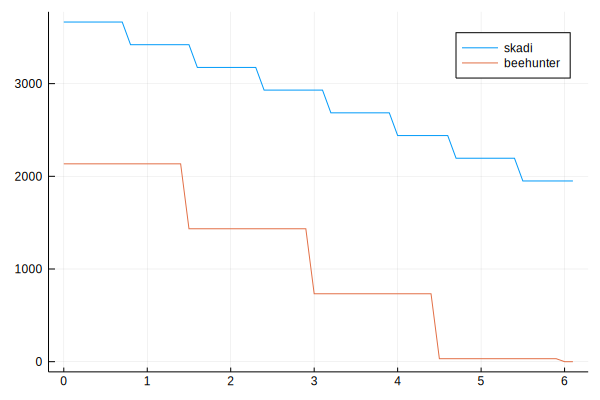

In [6]:
battle(skadi,beehunter)

In [7]:
function win(a::ark.character,b::ark.character)
    time=battletime(a,b)
    ahp=nowhp(a,b,time)
    bhp=nowhp(b,a,time)
    if ahp==bhp==0
        println("even")
    elseif ahp==0
        println("lose")
    else
        println("win")
    end
end

win (generic function with 1 method)

In [8]:
win(skadi,beehunter)

win


In [9]:
win(beehunter,skadi)

lose
